# Mentoring Week 03 Halilintar Basyeban

### 01. Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read Data
def read_file(fname):
    '''
    Function for read data
    '''
    df = pd.read_csv(fname)
    print(f"Dataset Original Shape{df.shape}")
    print('\n')
    print('Null Check')
    print(df.isnull().sum())
    return df
data = read_file(fname='credit_risk_dataset.csv')

Dataset Original Shape(32581, 12)


Null Check
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Splitting Data

In [4]:
#Split data into X Y
def split_input_output(data, target_col):
    '''
    Function to split into X, y
    '''
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    print(f"X Data Shape :{X.shape}")
    print(f"Y Data Shape :{y.shape}")
    
    return X, y

In [5]:
X, y = split_input_output(data = data, target_col='loan_status')

X Data Shape :(32581, 11)
Y Data Shape :(32581,)


In [6]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split data into X_train, X_test, y_train
def split_train_test(X, y, test_size, random_state, stratify):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, 
                                                        stratify=stratify)
    
    return X_train, X_test, y_train, y_test

In [10]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.2, 
                                                              random_state=123, stratify=y )

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size=0.5, random_state=123,
                                                    stratify =y_not_train)

In [11]:
print(f"X train data :{X_train.shape}")
print(f"y train data :{y_train.shape}")

print('\n')

print(f"y not train data : {y_not_train.shape}")
print(f"X not train data :{X_not_train.shape}")
print('\n')
print(f"X valid data :{X_valid.shape}")
print(f"y valid data :{y_valid.shape}")
print('\n')
print(f"X test data :{X_test.shape}")
print(f"y test data :{y_test.shape}")

X train data :(26064, 11)
y train data :(26064,)


y not train data : (6517,)
X not train data :(6517, 11)


X valid data :(3258, 11)
y valid data :(3258,)


X test data :(3259, 11)
y test data :(3259,)


In [12]:
print(round(len(X_train)/len(X),2))  # should be 0.8
print(round(len(X_valid)/len(X),2))  # should be 0.1
print(round(len(X_test)/len(X),2))   # should be 0.1

0.8
0.1
0.1


## EDA

Check For Anomalies

In [13]:
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,2.606400e+04,25352.000000,26064.000000,23579.000000,26064.000000,26064.000000
mean,27.702118,6.548399e+04,4.786762,9572.508057,11.005043,0.170350,5.793700
std,6.277055,4.991267e+04,4.100341,6313.316072,3.240768,0.106943,4.048879
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.470000,0.230000,8.000000
max,144.000000,1.900000e+06,123.000000,35000.000000,22.110000,0.830000,30.000000


In [14]:
X_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              712
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2485
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
'''
Check umur 
'''
person_age_check = np.sort(X_train['person_age'].unique())
person_age_check

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  69,  70,  73,  76,  78,
        80, 123, 144], dtype=int64)

In [16]:
'''
Menampilkan masa kerja anomali
'''
X_train[X_train['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3


In [17]:
'''
Menampilkan Umur anomali
'''
X_train[X_train['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0.26,N,4
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3


### Deleting Anomalies

In [18]:
def drop_rows_by_index(data_X, data_y, idx_to_drop):
    X_train_dropped = data_X.drop(index=idx_to_drop)
    y_train_dropped = data_y.drop(index=idx_to_drop)
    
    return X_train_dropped, y_train_dropped

idx_to_drop = X_train.index.values[
        (X_train['person_emp_length'] > 50) | 
        (X_train['person_age'] > 100)
    ]

In [19]:
X_train_dropped, y_train_dropped = drop_rows_by_index(data_X=X_train, data_y = y_train, idx_to_drop=idx_to_drop)

In [109]:
X_train_dropped.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29762,45,37500,MORTGAGE,1.0,DEBTCONSOLIDATION,B,5000,11.49,0.13,N,16
2714,25,50000,RENT,5.0,PERSONAL,A,12000,7.88,0.24,N,2
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,0.38,Y,4
28458,31,78504,RENT,2.0,EDUCATION,C,10000,11.41,0.13,N,7
3674,26,14000,RENT,2.0,VENTURE,B,4000,NaN,0.29,N,3


In [20]:
print('Shape of X train after dropped:', X_train_dropped.shape)
print('Shape of Y train after dropped:', y_train_dropped.shape)

Shape of X train after dropped: (26060, 11)
Shape of Y train after dropped: (26060,)


## Split Numerical & Categorical

In [21]:
def split_num_cat(data, num_cols, cat_cols):
    '''
    Split numerical and categorical
    '''
    num_data = data[num_cols]
    cat_data = data[cat_cols]
    
    print(f"Data num shape: {num_data.shape}")
    print(f"Data cat shape: {cat_data.shape}")
    
    return num_data, cat_data


In [22]:
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                    'cb_person_cred_hist_length']
categorical_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [23]:
X_train_num, X_train_cat =split_num_cat(data=X_train_dropped, num_cols=numerical_columns, cat_cols=categorical_columns)

Data num shape: (26060, 7)
Data cat shape: (26060, 4)


In [24]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29762,45,37500,1.0,5000,11.49,0.13,16
2714,25,50000,5.0,12000,7.88,0.24,2
50,24,78000,4.0,30000,NaN,0.38,4
28458,31,78504,2.0,10000,11.41,0.13,7
3674,26,14000,2.0,4000,NaN,0.29,3


In [25]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29762,MORTGAGE,DEBTCONSOLIDATION,B,N
2714,RENT,PERSONAL,A,N
50,RENT,DEBTCONSOLIDATION,D,Y
28458,RENT,EDUCATION,C,N
3674,RENT,VENTURE,B,N


In [26]:
X_train_cat.nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [27]:
for col in X_train_cat:
  print(X_train_cat[col].unique())

['MORTGAGE' 'RENT' 'OWN' 'OTHER']
['DEBTCONSOLIDATION' 'PERSONAL' 'EDUCATION' 'VENTURE' 'HOMEIMPROVEMENT'
 'MEDICAL']
['B' 'A' 'D' 'C' 'F' 'E' 'G']
['N' 'Y']


In [28]:
X_train_num.isnull().sum()

person_age                       0
person_income                    0
person_emp_length              712
loan_amnt                        0
loan_int_rate                 2484
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [29]:
X_train_cat.isnull().sum()

person_home_ownership        0
loan_intent                  0
loan_grade                   0
cb_person_default_on_file    0
dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

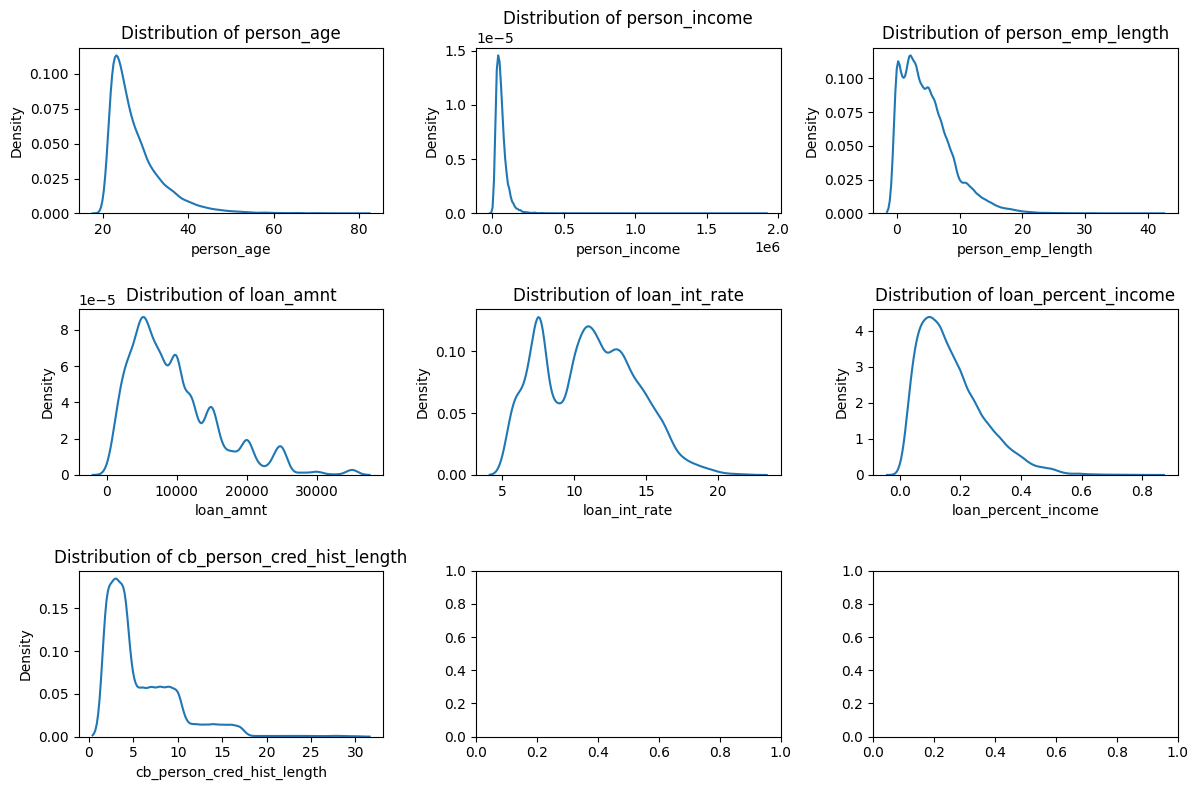

In [31]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
def num_imputer_fit(data):
    '''
    For imputing null data
    '''
    imputer = SimpleImputer(strategy='median')
    imputer.fit(data)
    
    return imputer


def num_imputer_transform(data, imputer):
    imputed_data = pd.DataFrame(imputer.transform(data), columns=data.columns)
    
    return imputed_data

In [34]:
num_imputer = num_imputer_fit(data = X_train_num)
X_train_num_imputed = num_imputer_transform(X_train_num, num_imputer)

In [35]:
X_train_num_imputed.isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [36]:
X_train_num_imputed.shape

(26060, 7)

## XTrain Num after impute

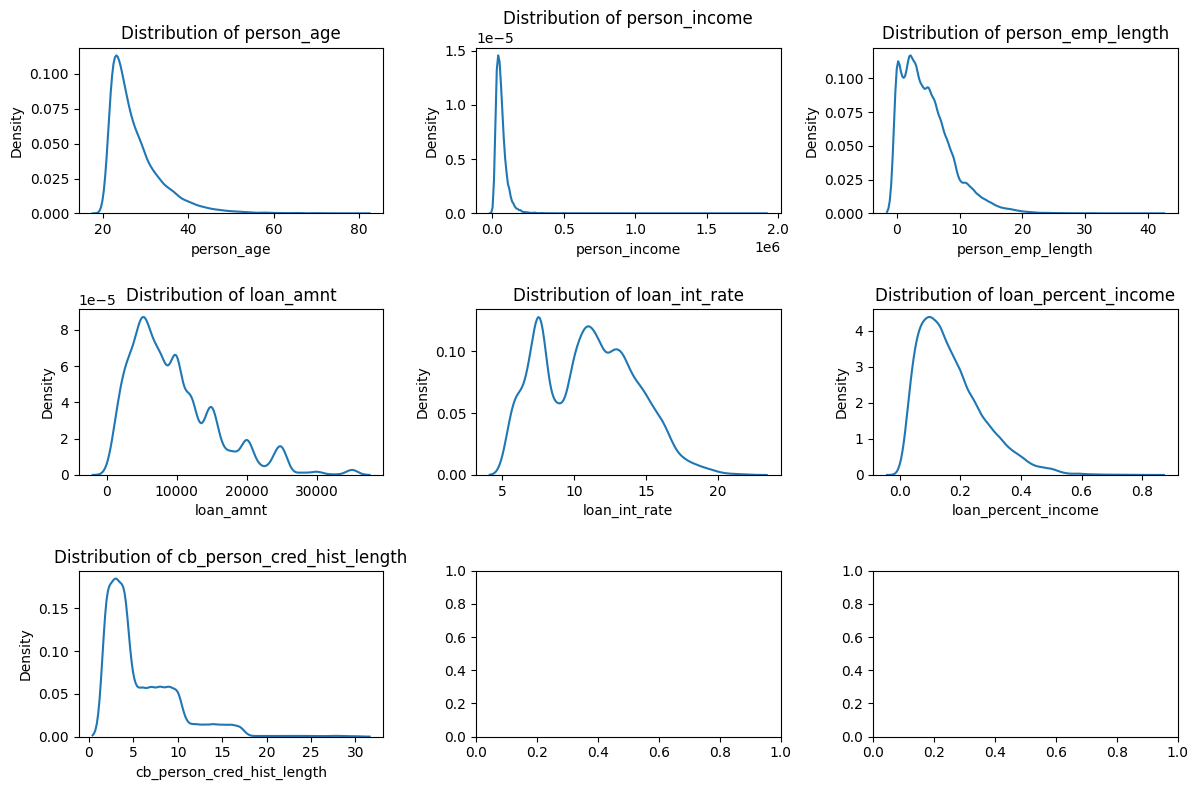

In [37]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num_imputed.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## One Hot Encoder & Label Encoder

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
def split_X_train_cat(data, ohe_cols, le_cols):
    X_train_cat_ohe=data[ohe_cols]
    X_train_cat_le=data[le_cols]
    
    print(f"X train Categorical OHE :{X_train_cat_ohe.shape}")
    print(f"X train Categorical LE :{X_train_cat_le.shape}")
    
    return X_train_cat_ohe,  X_train_cat_le

In [40]:
ohe_cols = ['loan_intent']
le_cols = ['person_home_ownership','loan_grade','cb_person_default_on_file']

In [41]:
X_train_cat_ohe, X_train_cat_le =  split_X_train_cat(data = X_train_cat, ohe_cols =ohe_cols , le_cols =le_cols)

X train Categorical OHE :(26060, 1)
X train Categorical LE :(26060, 3)


In [42]:
X_train_cat_ohe.head()

,loan_intent
29762,DEBTCONSOLIDATION
2714,PERSONAL
50,DEBTCONSOLIDATION
28458,EDUCATION
3674,VENTURE


In [43]:
X_train_cat_le.head()

,person_home_ownership,loan_grade,cb_person_default_on_file
29762,MORTGAGE,B,N
2714,RENT,A,N
50,RENT,D,Y
28458,RENT,C,N
3674,RENT,B,N


In [44]:
def cat_encoder_ohe_fit(data):
    '''
    One Hot Encoding
    '''
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    encoder.fit(data)

    return encoder

def cat_encoder_ohe_transform(data, encoder):
    encoded_data = encoder.transform(data)

    columns = encoder.get_feature_names_out(data.columns)
    encoded_df = pd.DataFrame(encoded_data, columns=columns)
    
    print(f"Data Shape After Transform :{encoded_df.shape}")

    return encoded_df

In [45]:
cat_encoder_ohe = cat_encoder_ohe_fit(X_train_cat_ohe)# WRITE YOUR CODE HERE

X_train_cat_ohe_encoded = cat_encoder_ohe_transform(X_train_cat_ohe, cat_encoder_ohe) # WRITE YOUR CODE HERE

Data Shape After Transform :(26060, 6)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
X_train_cat_ohe_encoded.shape

(26060, 6)

In [47]:
X_train_cat_ohe_encoded.head()

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
def label_encode_dataframe(data, X_train_cat_le):
    le = LabelEncoder()
    
    encoded_data = X_train_cat_le.apply(le.fit_transform)
    
    encoded_data.reset_index(drop=True, inplace=True)

    print(f"Data SHape After Encode {encoded_data.shape}")
    return encoded_data

In [49]:
X_train_cat_le_encoded = label_encode_dataframe(X_train_cat_le, X_train_cat_le)

Data SHape After Encode (26060, 3)


In [50]:
X_train_cat_le_encoded.head()

,person_home_ownership,loan_grade,cb_person_default_on_file
0,0,1,0
1,3,0,0
2,3,3,1
3,3,2,0
4,3,1,0


In [51]:
#concat categorical Data after encodezz
X_train_cat_encode = pd.concat((X_train_cat_ohe_encoded, X_train_cat_le_encoded), axis=1)

In [52]:
X_train_cat_encode.shape

(26060, 9)

In [53]:
X_train_cat_encode.head()

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,3,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,3,3,1
3,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0
4,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0


In [54]:
X_train_cat_encode.tail()

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
26055,1.0,0.0,0.0,0.0,0.0,0.0,3,1,0
26056,1.0,0.0,0.0,0.0,0.0,0.0,3,1,0
26057,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1
26058,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0
26059,0.0,1.0,0.0,0.0,0.0,0.0,3,4,0


In [55]:
#Concat categorical and numerical data after impute
X_train_encode = pd.concat((X_train_num_imputed, X_train_cat_encode), axis=1)

In [56]:
X_train_encode

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
0,45.0,37500.0,1.0,5000.0,11.49,0.13,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,25.0,50000.0,5.0,12000.0,7.88,0.24,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,0
2,24.0,78000.0,4.0,30000.0,10.99,0.38,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3,1
3,31.0,78504.0,2.0,10000.0,11.41,0.13,7.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0
4,26.0,14000.0,2.0,4000.0,10.99,0.29,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,22.0,47000.0,3.0,6850.0,10.65,0.15,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,0
26056,22.0,40000.0,1.0,17000.0,10.65,0.42,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,0
26057,27.0,34000.0,12.0,10625.0,13.47,0.31,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1
26058,26.0,74500.0,8.0,5000.0,11.36,0.07,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0


In [57]:
X_train_encode.shape

(26060, 16)

In [58]:
X_train_encode.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
0,45.0,37500.0,1.0,5000.0,11.49,0.13,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,25.0,50000.0,5.0,12000.0,7.88,0.24,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0,0
2,24.0,78000.0,4.0,30000.0,10.99,0.38,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3,1
3,31.0,78504.0,2.0,10000.0,11.41,0.13,7.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0
4,26.0,14000.0,2.0,4000.0,10.99,0.29,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
def fit_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    
    return scaler

def transform_scaler(data, scaler):
    scaled_data = scaler.transform(data)

    return pd.DataFrame(scaled_data, columns = data.columns, index = data.index)

In [61]:
scaler = fit_scaler(data=X_train_encode)# Write your code here

X_train_clean = transform_scaler(data=X_train_encode, scaler =scaler)# Write your code here

In [62]:
X_train_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
0,2.801020,-0.560618,-0.945085,-0.724280,0.157882,-0.377254,2.520609,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,-1.170364,-0.185624,-0.463776
1,-0.435387,-0.310128,0.060115,0.384902,-1.013290,0.651637,-0.937047,-0.43671,-0.497420,-0.353034,-0.476433,2.214183,-0.462554,0.924491,-1.043009,-0.463776
2,-0.597208,0.250968,-0.191185,3.237084,-0.004330,1.961135,-0.443096,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,1.529146,2.156212
3,0.535535,0.261068,-0.693785,0.067993,0.131928,-0.377254,0.297830,-0.43671,2.010372,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,0.671761,-0.463776
4,-0.273567,-1.031538,-0.693785,-0.882734,-0.004330,1.119315,-0.690072,-0.43671,-0.497420,-0.353034,-0.476433,-0.451634,2.161909,0.924491,-0.185624,-0.463776


In [63]:
X_train_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
count,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04,2.606000e+04
mean,-1.476435e-16,6.080239e-17,5.330434e-17,-4.744222e-17,-1.354421e-16,-3.913983e-16,-6.448325e-17,-1.172423e-17,1.226954e-18,-4.294339e-17,6.134770e-17,-1.090626e-17,7.620748e-17,-1.047682e-16,-3.081018e-17,-5.398598e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.244489e+00,-1.231930e+00,-1.196385e+00,-1.437325e+00,-1.811375e+00,-1.593217e+00,-9.370471e-01,-4.367099e-01,-4.974205e-01,-3.530342e-01,-4.764327e-01,-4.516339e-01,-4.625541e-01,-1.170364e+00,-1.043009e+00,-4.637762e-01
25%,-7.590282e-01,-5.425827e-01,-6.937851e-01,-7.242799e-01,-8.153914e-01,-7.513966e-01,-6.900717e-01,-4.367099e-01,-4.974205e-01,-3.530342e-01,-4.764327e-01,-4.516339e-01,-4.625541e-01,-1.170364e+00,-1.043009e+00,-4.637762e-01
50%,-2.735671e-01,-2.099327e-01,-1.911848e-01,-2.489162e-01,-4.330059e-03,-1.901830e-01,-4.430963e-01,-4.367099e-01,-4.974205e-01,-3.530342e-01,-4.764327e-01,-4.516339e-01,-4.625541e-01,9.244905e-01,-1.856242e-01,-4.637762e-01
75%,3.737144e-01,2.710071e-01,5.627156e-01,4.245156e-01,6.834500e-01,5.581016e-01,5.448054e-01,-4.367099e-01,-4.974205e-01,-3.530342e-01,-4.764327e-01,-4.516339e-01,-4.625541e-01,9.244905e-01,6.717610e-01,-4.637762e-01
max,8.464733e+00,3.676231e+01,9.106921e+00,4.029357e+00,3.603271e+00,6.170237e+00,5.978265e+00,2.289850e+00,2.010372e+00,2.832586e+00,2.098932e+00,2.214183e+00,2.161909e+00,9.244905e-01,4.101302e+00,2.156212e+00


In [64]:
X_train_clean

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
0,2.801020,-0.560618,-0.945085,-0.724280,0.157882,-0.377254,2.520609,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,-1.170364,-0.185624,-0.463776
1,-0.435387,-0.310128,0.060115,0.384902,-1.013290,0.651637,-0.937047,-0.43671,-0.497420,-0.353034,-0.476433,2.214183,-0.462554,0.924491,-1.043009,-0.463776
2,-0.597208,0.250968,-0.191185,3.237084,-0.004330,1.961135,-0.443096,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,1.529146,2.156212
3,0.535535,0.261068,-0.693785,0.067993,0.131928,-0.377254,0.297830,-0.43671,2.010372,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,0.671761,-0.463776
4,-0.273567,-1.031538,-0.693785,-0.882734,-0.004330,1.119315,-0.690072,-0.43671,-0.497420,-0.353034,-0.476433,-0.451634,2.161909,0.924491,-0.185624,-0.463776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,-0.920849,-0.370246,-0.442485,-0.431139,-0.114634,-0.190183,-0.443096,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,-0.185624,-0.463776
26056,-0.920849,-0.510520,-0.945085,1.177175,-0.114634,2.335278,-0.443096,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,-0.185624,-0.463776
26057,-0.111747,-0.630755,1.819216,0.167027,0.800243,1.306386,1.038756,-0.43671,-0.497420,-0.353034,-0.476433,-0.451634,2.161909,-1.170364,0.671761,2.156212
26058,-0.273567,0.180831,0.814016,-0.724280,0.115707,-0.938468,-0.937047,-0.43671,-0.497420,-0.353034,-0.476433,-0.451634,2.161909,0.924491,-0.185624,-0.463776


In [65]:
#Deep Copy
X_train_clean_copy = X_train_clean.copy()
X_valid_copy = X_valid.copy()
X_test_copy= X_test.copy()

In [82]:
X_train_clean_copy.shape

(26060, 16)

In [91]:
def preprocess_data(data, num_cols, cat_cols, ohe_cols, le_cols):
    '''
    Preprocess data function
    -> need input data, num_cols, cat_cols, num_imputer, & cat encoder (ohe & le)
    '''

    
    
    #splitting num_cols dan cat_cols terlebih dahulu
    num_data = data[num_cols]
    cat_data = data[cat_cols]
    print(f"num data shape : {num_data.shape}")
    print(f"cat data shape : {cat_data.shape}")
    print('\n')
    
    #impute null data
    num_imputer = num_imputer_fit(data=num_data)
    X_train_num_imputed = num_imputer_transform(num_data, num_imputer)
    print(f"num impute data shape : {X_train_num_imputed.shape}")
    print('\n')
    
    #Split categorical ohe & le
    X_train_cat_ohe, X_train_cat_le =  split_X_train_cat(data = cat_data, ohe_cols =ohe_cols , le_cols =le_cols)
    
    #one hot encoder
    cat_encoder_ohe = cat_encoder_ohe_fit(X_train_cat_ohe)
    X_train_cat_ohe_encoded = cat_encoder_ohe_transform(X_train_cat_ohe, cat_encoder_ohe)
    print('\n')
    
    #label Encoder
    X_train_cat_le_encoded = label_encode_dataframe(X_train_cat_le, X_train_cat_le)
    
    #concating one hot encoder & label encoder
    X_cat_concat = pd.concat((X_train_cat_ohe_encoded, X_train_cat_le_encoded), axis=1)
    
    #concating categorical & numerical
    X_train_encode = pd.concat((X_train_num_imputed, X_cat_concat), axis=1)
    print(f"Data Shape After concat :{X_train_encode.shape}")
    
    #Scaling
    scaler = fit_scaler(data=X_train_encode)
    X_train_clean = transform_scaler(data=X_train_encode, scaler =scaler)
    
    return X_train_clean

    
    
    


In [94]:
X_train_clean = preprocess_data(data = X_train_dropped,
                            num_cols=numerical_columns, cat_cols=categorical_columns,
                              ohe_cols=ohe_cols, le_cols=le_cols)

num data shape : (26060, 7)
cat data shape : (26060, 4)


num impute data shape : (26060, 7)


X train Categorical OHE :(26060, 1)
X train Categorical LE :(26060, 3)
Data Shape After Transform :(26060, 6)


Data SHape After Encode (26060, 3)
Data Shape After concat :(26060, 16)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [105]:
X_train_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership,loan_grade,cb_person_default_on_file
0,2.801020,-0.560618,-0.945085,-0.724280,0.157882,-0.377254,2.520609,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,-1.170364,-0.185624,-0.463776
1,-0.435387,-0.310128,0.060115,0.384902,-1.013290,0.651637,-0.937047,-0.43671,-0.497420,-0.353034,-0.476433,2.214183,-0.462554,0.924491,-1.043009,-0.463776
2,-0.597208,0.250968,-0.191185,3.237084,-0.004330,1.961135,-0.443096,2.28985,-0.497420,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,1.529146,2.156212
3,0.535535,0.261068,-0.693785,0.067993,0.131928,-0.377254,0.297830,-0.43671,2.010372,-0.353034,-0.476433,-0.451634,-0.462554,0.924491,0.671761,-0.463776
4,-0.273567,-1.031538,-0.693785,-0.882734,-0.004330,1.119315,-0.690072,-0.43671,-0.497420,-0.353034,-0.476433,-0.451634,2.161909,0.924491,-0.185624,-0.463776


In [108]:
y_train_dropped.shape

(26060,)

In [96]:
X_valid_clean = preprocess_data(data = X_valid,
                            num_cols=numerical_columns, cat_cols=categorical_columns,
                              ohe_cols=ohe_cols, le_cols=le_cols)

num data shape : (3258, 7)
cat data shape : (3258, 4)


num impute data shape : (3258, 7)


X train Categorical OHE :(3258, 1)
X train Categorical LE :(3258, 3)
Data Shape After Transform :(3258, 6)


Data SHape After Encode (3258, 3)
Data Shape After concat :(3258, 16)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
X_test_clean = preprocess_data(data = X_test,
                            num_cols=numerical_columns, cat_cols=categorical_columns,
                              ohe_cols=ohe_cols, le_cols=le_cols)

num data shape : (3259, 7)
cat data shape : (3259, 4)


num impute data shape : (3259, 7)


X train Categorical OHE :(3259, 1)
X train Categorical LE :(3259, 3)
Data Shape After Transform :(3259, 6)


Data SHape After Encode (3259, 3)
Data Shape After concat :(3259, 16)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 02. Modeling

### Define your metrics (you can use more than 1 metrics, just explain why) for optimizing the model.

Pada Task kali ini, saya menggunakan Recall metrics, untuk mengetahui seberapa banyak jumlah True positive yang dicapai oleh model ini

### Baseline Model

Pada baseline model pada task ini, saya menggunakan Dummy Classifier sebagai baseline, karena dummy classifier merupaka\n model yang sangat sederhana dan mudah dimengerti. 

In [98]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

In [99]:
dummy_classifier = DummyClassifier(strategy='most_frequent')

In [100]:
dummy_classifier.fit(X_train_clean, y_train_dropped)

DummyClassifier(strategy='most_frequent')

In [101]:
y_pred_valid = dummy_classifier.predict(X_valid_clean)
y_pred_test = dummy_classifier.predict(X_test_clean)

In [103]:
recall_valid = recall_score(y_valid, y_pred_valid)
recall_test = recall_score(y_test, y_pred_test)

In [104]:
print(f"Validation Recall: {recall_valid:.4f}")
print(f"Test Recall: {recall_test:.4f}")

Validation Recall: 0.0000
Test Recall: 0.0000
